# Detecting text in natural scenes

In this recipe, you will learn how to detect text in natural images using a pre-trained convolutional neural network model. Detecting text in natural environments is important in applications like reading traffic sign messages, understanding ad messages, and reading banners.

Before you proceed with this recipe, you will need to install the OpenCV 3.x Python API package and the matplotlib package. OpenCV must be built with contrib modules, because the advanced text recognition functionality isn't a part of the main OpenCV repository.

The modified .prototxt file with the model description for this recipe can be found at opencv_contrib/modules/text/samples/textbox.prototxt. 
 
The model weights can be downloaded from 
https://www.dropbox.com/s/g8pjzv2de9gty8g/TextBoxes_icdar13.caffemodel?dl=0. 

There are many different text detection methods implemented in OpenCV. In this recipe, you learned how to use a state-of-the-art deep learning approach for detecting text bounding boxes. The OpenCV class `cv2.TextDetectorCNN_create` creates a CNN (convolutional neural network) model, and loads its pre-trained weights from a specified file. After that, you only need to call the `det.detect` method, which returns a list of rectangles with the associated probabilities of rectangles containing text.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S04\env


------  img----------------------    Shape(1080, 1920, 3) img: uint8
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] [235 225 211] ]
[ [235 225 21

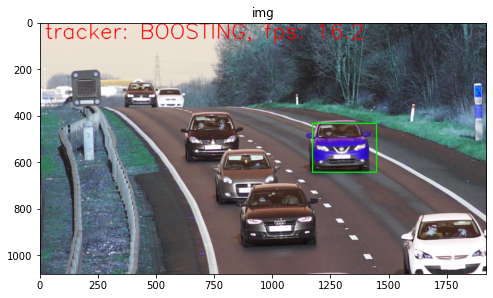

In [5]:
#img = cv2.imread('../data/scenetext01.jpg')
img = cv2.imread('frameBOOSTING.png')



###########################################################
print_image('img','img',img,118,128,190,197)
plt_view_image(plt,[["img",img]],figsize=(8,8), axis='on', cmap='gray')
# Display digits image
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
textSpotter = cv2.text.TextDetectorCNN_create("data/textbox.prototxt", "data/TextBoxes_icdar13.caffemodel")
print(textSpotter)
rects, outProbs = textSpotter.detect(img);

det = cv2.text.TextDetectorCNN_create("data/textbox.prototxt", "data/TextBoxes_icdar13.caffemodel")
print(det)
rects, probs = det.detect(img)

<text_TextDetectorCNN 00000249ACFF6870>


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\dnn\src\layers\prior_box_layer.cpp:209: error: (-215:Assertion failed) _minSize.size() == _maxSize.size() in function 'cv::dnn::PriorBoxLayerImpl::PriorBoxLayerImpl'


In [ ]:
THR = 0.3
for i, r in enumerate(rects):
    if probs[i] > THR:
        cv2.rectangle(img, (r[0], r[1]), (r[0]+r[2], r[1]+r[3]), (0, 255, 0), 2)

In [ ]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()